# Caterpillar Tube Pricing
## Environment : Python 3
## Author : Arion

In this notebook, we will have a first look at these datasets. The main object is to understand general situation about data, finger out their special places and make a preliminary plan.

### import packages 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

### read all 21 csvs

In [2]:
bill_of_materials_df = pd.read_csv('../input/bill_of_materials.csv')
comp_adaptor_df = pd.read_csv('../input/comp_adaptor.csv')
comp_boss_df = pd.read_csv('../input/comp_boss.csv')
comp_elbow_df = pd.read_csv('../input/comp_elbow.csv')
comp_float_df = pd.read_csv('../input/comp_float.csv')
comp_hfl_df = pd.read_csv('../input/comp_hfl.csv')
comp_nut_df = pd.read_csv('../input/comp_nut.csv')
comp_other_df = pd.read_csv('../input/comp_other.csv')
comp_sleeve_df = pd.read_csv('../input/comp_sleeve.csv')
comp_straight_df = pd.read_csv('../input/comp_straight.csv')
comp_tee_df = pd.read_csv('../input/comp_tee.csv')
comp_threaded_df = pd.read_csv('../input/comp_threaded.csv')
components_df = pd.read_csv('../input/components.csv')
specs_df = pd.read_csv('../input/specs.csv')
test_set_df = pd.read_csv('../input/test_set.csv')
train_set_df = pd.read_csv('../input/train_set.csv')
tube_end_form_df = pd.read_csv('../input/tube_end_form.csv')
tube_df = pd.read_csv('../input/tube.csv')
type_component_df = pd.read_csv('../input/type_component.csv')
type_connection_df = pd.read_csv('../input/type_connection.csv')
type_end_form_df = pd.read_csv('../input/type_end_form.csv')

# first look at data

In [3]:
train_set_df.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [4]:
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30213 entries, 0 to 30212
Data columns (total 8 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null object
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null object
quantity              30213 non-null int64
cost                  30213 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
train_set_df.quote_date = pd.to_datetime(train_set_df.quote_date)

In [6]:
print (train_set_df.quote_date.sort_values())

8449    1982-09-22
8445    1982-09-22
8446    1982-09-22
8447    1982-09-22
8448    1982-09-22
8450    1982-09-22
26122   1987-04-10
30198   1988-08-03
8426    1988-12-01
26185   1989-03-15
24966   1989-10-17
30169   1991-05-30
26141   1991-09-01
32      1992-07-21
25488   1992-08-01
24209   1992-08-01
69      1993-02-02
404     1993-02-04
59      1993-09-24
405     1993-11-12
495     1994-03-10
1243    1994-03-16
1119    1994-04-09
937     1994-05-02
1172    1994-06-08
74      1994-09-01
836     1994-11-16
622     1994-11-23
24220   1994-12-12
1653    1995-02-20
           ...    
18956   2014-09-02
18958   2014-09-02
18959   2014-09-02
21432   2014-11-01
23294   2015-01-01
22148   2015-01-01
22386   2015-01-01
23616   2015-01-01
23595   2015-01-01
23593   2015-01-01
23591   2015-01-01
23535   2015-01-01
23296   2015-01-01
23532   2015-01-01
23323   2015-01-01
21420   2015-01-01
23237   2015-01-01
23292   2015-01-01
23335   2015-01-01
23333   2015-01-01
23331   2015-01-01
23329   2015

In [7]:
test_set_df.head()

,id,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity
0,1,TA-00001,S-0066,2013-06-23,0,0,Yes,1
1,2,TA-00001,S-0066,2013-06-23,0,0,Yes,2
2,3,TA-00001,S-0066,2013-06-23,0,0,Yes,5
3,4,TA-00001,S-0066,2013-06-23,0,0,Yes,10
4,5,TA-00001,S-0066,2013-06-23,0,0,Yes,25


In [8]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30235 entries, 0 to 30234
Data columns (total 8 columns):
id                    30235 non-null int64
tube_assembly_id      30235 non-null object
supplier              30235 non-null object
quote_date            30235 non-null object
annual_usage          30235 non-null int64
min_order_quantity    30235 non-null int64
bracket_pricing       30235 non-null object
quantity              30235 non-null int64
dtypes: int64(4), object(4)
memory usage: 1.8+ MB


In [9]:
# test_set_df

#id: (integer) observation index
#tube_assembly_id: (string) ID
#supplier: (string) ID
#quote_date: (string) when price was quoted by supplier 
#annual_usage: (int) estimate of how many tube assemblies will be purchased in a given year
#min_order_quantity: (integer) number of assemblies required, at minimum, for non-bracket pricing
#bracket_pricing: (string) does this assembly have bracket-pricing or not?
#quantity: (integer) how many assemblies are sought for purchase?

In [10]:
test_set_df.quote_date = pd.to_datetime(test_set_df.quote_date)

In [11]:
print (test_set_df.quote_date.sort_values())

25520   1985-11-16
17584   1987-09-30
17582   1987-09-30
17583   1987-09-30
17578   1987-09-30
17579   1987-09-30
17585   1987-09-30
17580   1987-09-30
17581   1987-09-30
30194   1988-03-01
26440   1989-10-01
25986   1992-06-22
30213   1992-08-01
24263   1992-08-01
165     1992-10-06
164     1992-10-06
158     1992-10-06
159     1992-10-06
162     1992-10-06
160     1992-10-06
163     1992-10-06
161     1992-10-06
24250   1993-02-06
27880   1993-09-08
25357   1993-12-01
25356   1993-12-01
25354   1993-12-01
25355   1993-12-01
562     1994-01-04
559     1994-08-03
           ...    
21379   2014-09-01
21377   2014-09-01
23378   2014-09-01
23379   2014-09-01
22607   2014-09-01
22465   2014-09-01
22118   2014-09-01
19212   2014-09-02
19217   2014-09-02
19216   2014-09-02
19213   2014-09-02
19215   2014-09-02
19214   2014-09-02
23934   2014-12-01
23360   2015-01-01
23865   2015-01-01
23364   2015-01-01
23715   2015-01-01
23711   2015-01-01
23848   2015-01-01
23368   2015-01-01
23362   2015

In [12]:
train_id_unique = set(train_set_df.tube_assembly_id.unique())
test_id_unique = set(test_set_df.tube_assembly_id.unique())

train_id_unique & test_id_unique
#There is no common tube_assembly_id between train and test data.

set()

In [13]:
train_supplier_unique = set(train_set_df.supplier.unique())
test_supplier_unique = set(test_set_df.supplier.unique())

print ("Train", len(train_supplier_unique))
print ("Test", len(test_supplier_unique))
print ("Common", len(train_supplier_unique & test_supplier_unique))
#There is 45 common supplier between train and test data.

Train 57
Test 56
Common 45


In [14]:
#bill_of_materials_df.head().transpose()
bill_of_materials_df.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# bill_of_materials variables

# tube_assembly_id: ID
# component_id_1: ID
# quantity_1: number of components needed for assembly (conceptually integers, practically floats)
# component_id_2: ID
# quantity_2: number of components needed for assembly (conceptually integers, practically floats)
# component_id_3: ID
# quantity_3: number of components needed for assembly (conceptually integers, practically floats)
# etc.

In [16]:
bill_of_materials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 17 columns):
tube_assembly_id    21198 non-null object
component_id_1      19149 non-null object
quantity_1          19149 non-null float64
component_id_2      14786 non-null object
quantity_2          14786 non-null float64
component_id_3      4791 non-null object
quantity_3          4798 non-null float64
component_id_4      607 non-null object
quantity_4          608 non-null float64
component_id_5      92 non-null object
quantity_5          92 non-null float64
component_id_6      26 non-null object
quantity_6          26 non-null float64
component_id_7      7 non-null object
quantity_7          7 non-null float64
component_id_8      1 non-null object
quantity_8          1 non-null float64
dtypes: float64(8), object(9)
memory usage: 2.7+ MB


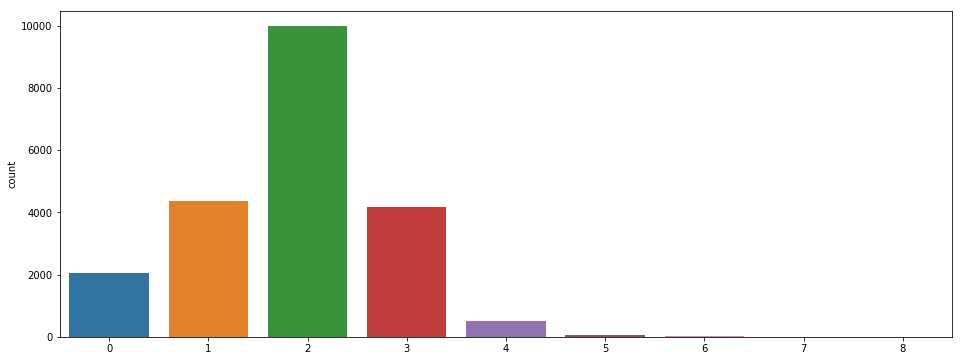

In [17]:
#The 1,3,5,7...15 columns of bill_comp_types_df are informations about component_id.

#We calculate each tube_assembly uses how many different component for assembly 
#Shown as component_series, then use a graph to present the information.

bill_comp_types_df = bill_of_materials_df.iloc[:,[1,3,5,7,9,11,13,15]] 
bill_comp_types_logical_df = ~bill_comp_types_df.isnull()
component_series = bill_comp_types_logical_df.sum(axis = 1)

plt.figure(figsize=(16, 6))
sns.countplot(component_series)
# almost half of all tube assemblies have exactly 2 types of components

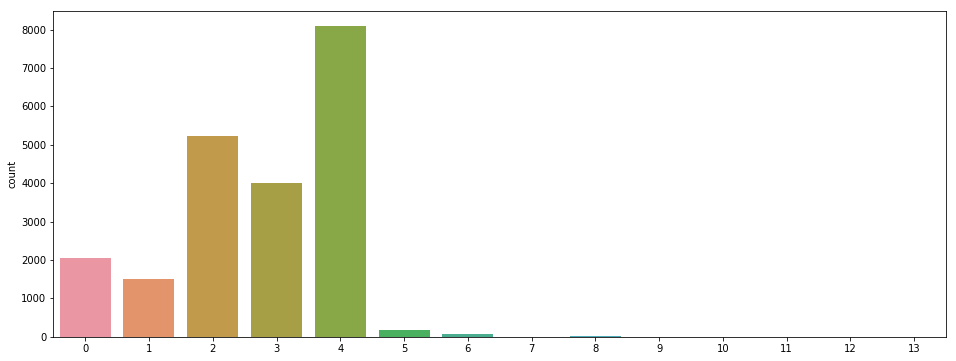

In [18]:
#The 2,4,6,8...16 columns of bill_comp_types_df are informations about how many number of 
#components needed for assembly

#Then we calculate the total number of components needed for assembly, present the information by a graph.

bill_comp_quants_df = bill_of_materials_df.iloc[:,[2,4,6,8,10,12,14,16]]
quants_series = bill_comp_quants_df.sum(axis = 1)
quants_series = quants_series.astype(int)

plt.figure(figsize=(16, 6))
sns.countplot(quants_series)

In [19]:
comp_adaptor_df.head()

,component_id,component_type_id,adaptor_angle,overall_length,end_form_id_1,connection_type_id_1,length_1,thread_size_1,thread_pitch_1,nominal_size_1,end_form_id_2,connection_type_id_2,length_2,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,unique_feature,orientation,weight
0,C-0005,CP-028,NaN,58.4,A-001,B-001,NaN,1.312,12.0,NaN,A-001,B-004,NaN,1.000,11.5,NaN,34.93,No,No,0.206
1,C-0006,CP-028,NaN,34.8,A-001,B-001,NaN,0.437,20.0,NaN,A-001,B-005,NaN,0.750,16.0,NaN,22.20,No,No,0.083
2,C-1435,CP-028,NaN,20.3,A-007,B-004,NaN,NaN,NaN,15.88,A-001,B-007,NaN,0.875,18.0,NaN,22.22,No,No,0.023
3,C-1546,CP-028,NaN,26.4,A-007,B-004,NaN,0.125,27.0,NaN,A-001,B-004,NaN,0.125,27.0,NaN,15.88,No,No,0.026
4,C-1583,CP-028,NaN,44.5,A-001,B-005,NaN,1.312,12.0,NaN,A-007,B-005,NaN,1.062,12.0,NaN,38.10,No,No,0.256


In [20]:
# comp_[type] variables: 

# 1. we're not sure what each column physically refers to or the length units.
# 2. 9999 could be another NaN

# There appear to be 11 basic component types, with further broken down subtypes. Each type has type-specific
# variables that may not apply to other component types.

In [21]:
comp_adaptor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 20 columns):
component_id            25 non-null object
component_type_id       25 non-null object
adaptor_angle           1 non-null float64
overall_length          24 non-null float64
end_form_id_1           25 non-null object
connection_type_id_1    24 non-null object
length_1                1 non-null float64
thread_size_1           17 non-null float64
thread_pitch_1          17 non-null float64
nominal_size_1          8 non-null float64
end_form_id_2           25 non-null object
connection_type_id_2    24 non-null object
length_2                1 non-null float64
thread_size_2           23 non-null float64
thread_pitch_2          23 non-null float64
nominal_size_2          2 non-null float64
hex_size                17 non-null float64
unique_feature          25 non-null object
orientation             25 non-null object
weight                  23 non-null float64
dtypes: float64(12), object(8)

In [22]:
components_df.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


In [23]:
components_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 3 columns):
component_id         2048 non-null object
name                 2047 non-null object
component_type_id    2048 non-null object
dtypes: object(3)
memory usage: 48.1+ KB


In [24]:
specs_df.head()

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# specs_df

# list of specifications for components of each tube assembly (may be 0-10)

In [26]:
specs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21198 entries, 0 to 21197
Data columns (total 11 columns):
tube_assembly_id    21198 non-null object
spec1               7129 non-null object
spec2               6844 non-null object
spec3               5840 non-null object
spec4               4154 non-null object
spec5               2921 non-null object
spec6               2071 non-null object
spec7               535 non-null object
spec8               106 non-null object
spec9               20 non-null object
spec10              1 non-null object
dtypes: object(11)
memory usage: 1.8+ MB


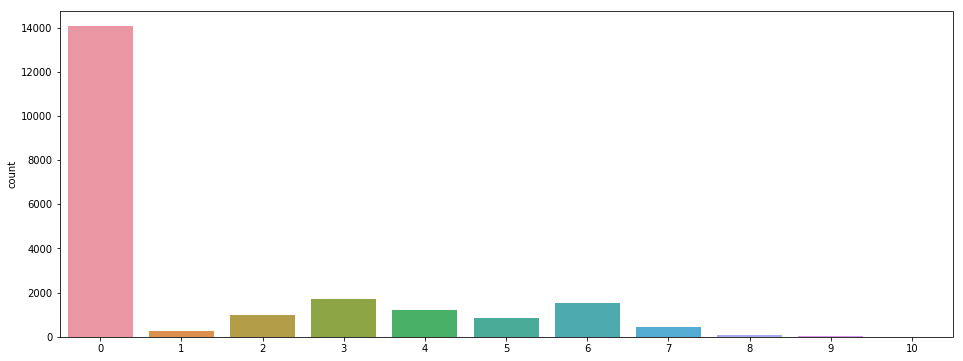

In [27]:
#calculate the number of specs needed for assembly of each tube assembly 

#specs_only_df: information about specs
#specs_totals: the number of specs needed for assembly 

specs_only_df = specs_df.iloc[:, 1:11]
specs_logical_df = ~specs_only_df.isnull()
specs_totals = specs_logical_df.sum(axis=1)

plt.figure(figsize=(16, 6))
sns.countplot(specs_totals)

In [28]:
tube_end_form_df.head()

,end_form_id,forming
0,EF-001,Yes
1,EF-002,No
2,EF-003,No
3,EF-004,No
4,EF-005,Yes


In [29]:
# tube_end_form_df
# 9999 might be 'other' category

# end_form_id: (string) ID
# forming: (string) forming or not

In [30]:
tube_df.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [31]:
# tube_df

#tube_assembly_id: (string) ID
#material_id: (string) material specification for the tube
#diameter: (float) tube diameter
#wall: (float) wall thickness
#length: (float) tube length
#num_bends: (integer) number of bends in tube
#bend_radius: (float) (guess) radius of all bends in tube
#end_a_1x: (string) length of end a is less than 1x diameter
#end_a_2x: (string) length of end a is less than 2x diameter
#end_x_1x: (string) length of end x is less than 1x diameter
#end_x_2x: (string) length of end x is less than 2x diameter
#end_a: (string) end form of end a
#end_x: (string) end form of end x
#num_boss: (integer) number of bosses
#num_bracket: (integer) number of brackets
#other: (integer) other tube prep required steps

In [32]:
type_component_df.head()

,component_type_id,name
0,CP-001,4-bolt Tig Straight
1,CP-002,4-bolt MJ Straight
2,CP-003,4-bolt Braze/Weld Straight
3,CP-004,2-bolt Braze/Weld Straight
4,CP-005,2-bolt MJ Straight


In [33]:
# type_component_df

# component_type_id: (string) ID
# name: (string) defines how component is attached to tube

In [34]:
type_connection_df.head()

,connection_type_id,name
0,B-001,37 deg Flare-SAE J514
1,B-002,ORFS-SAE J1453
2,B-003,Hi-Duty
3,B-004,NPTF-SAE J476/J514
4,B-005,SAE STOR-SAE J1926


In [35]:
# type_connection_df
# refer only to adaptors

# connection_type_id: (string) ID
# name: (string) connection type description

In [36]:
type_end_form_df

,end_form_id,name
0,A-001,Male (Stud)
1,A-002,Male (Swivel)
2,A-003,Braze-Weld Boss
3,A-004,Braze-Weld Socket
4,A-005,Swivel Nut
5,A-006,Bulkhead Male
6,A-007,Port
7,9999,Other


In [37]:
# type_end_form_df

#end_form_id = (string) ID
#name = (string) end form description